# Enhanced-Analytic-System-for-Smart-University-Assistance
Name - Rahul Bordoloi                                         
Roll No - 1729048                                           
Project Name - Be-Friend      
Github Repo -  [Link](https://github.com/rahulbordoloi/Enhanced-Analytic-System-for-Smart-University-Assistance/)                  
Email - rahulbordoloi24@gmail.com, 1729048@kiit.ac.in                          
Language - Python                      
Project is Done on Google Colab.                      

*   Libraries Pre-requisites -  [requirements.txt](https://drive.google.com/file/d/1IPznNDrrz_7DHokUfSML4lq4hAPmyEcI/view?usp=sharing)        

*   Download Pre-loaded Model -  [Pickle Link](https://drive.google.com/file/d/1q0_bDgkY8V8fkADRffcBShXkh3MWs8Ex/view?usp=sharing)


To install , download the file and run -
```
!pip install -r requirements.txt
```
*   RAM of 8GB is preferred if run on Local.







# 1. Importing Libaries and Dataset

In [1]:
#upload files
from google.colab import files
uploaded = files.upload()

Saving Branch_Allocation_Final.csv to Branch_Allocation_Final.csv


In [0]:
#downgrading colab 
!pip install -r "requirements.txt"

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
df = pd.read_csv('Branch_Allocation_Final.csv',error_bad_lines=False) 

# 2. Visualising the Data

In [4]:
df

,Rank,Nationality,10th,12th,Gender,Department
0,1595,India,85,94,F,"[CS,Civil,Mech,Electronics,Electrical]"
1,11564,India,84,53,F,[Not Eligible]
2,4769,India,84,47,M,[Not Eligible]
3,7669,India,89,92,F,"[Civil,Mech,Electronics,Electrical]"
4,6479,India,76,90,F,"[Civil,Mech,Electronics,Electrical]"
...,...,...,...,...,...,...
595,13138,Nepal,87,57,M,[Not Eligible]
596,14925,Ethiopia,77,55,F,[Not Eligible]
597,3387,Ethiopia,93,83,M,"[CS,Civil,Mech,Electronics,Electrical]"
598,11544,Ethiopia,76,63,F,[Not Eligible]


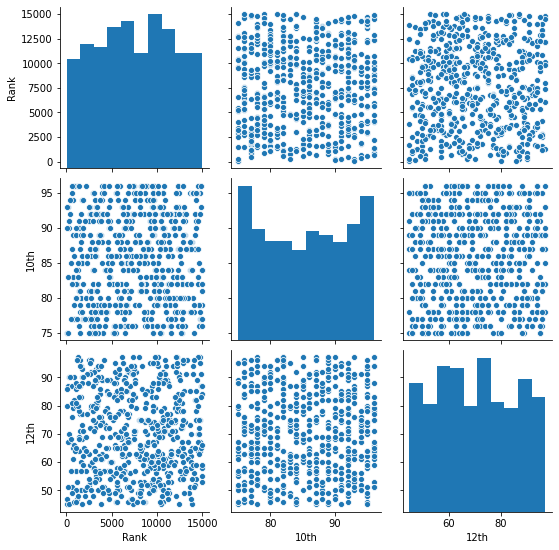

In [5]:
sns.pairplot(df)

In [6]:
df['Nationality'].unique()

array(['India', 'Ethiopia', 'Nepal'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         600 non-null    int64 
 1   Nationality  600 non-null    object
 2   10th         600 non-null    int64 
 3   12th         600 non-null    int64 
 4   Gender       600 non-null    object
 5   Department   600 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 28.2+ KB


In [24]:
df.describe()

,Rank,10th,12th,Department
count,600.000000,600.000000,600.000000,600.000000
mean,7568.771667,85.481667,70.521667,3.311667
std,4158.538343,6.371865,14.844644,1.814760
min,57.000000,75.000000,45.000000,0.000000
25%,3914.500000,80.000000,58.000000,2.000000
50%,7466.000000,86.000000,70.000000,4.000000
75%,10858.250000,91.000000,83.000000,5.000000
max,14992.000000,96.000000,97.000000,5.000000


In [0]:
x = df.iloc[:,:5]

In [8]:
x

,Rank,Nationality,10th,12th,Gender
0,1595,India,85,94,F
1,11564,India,84,53,F
2,4769,India,84,47,M
3,7669,India,89,92,F
4,6479,India,76,90,F
...,...,...,...,...,...
595,13138,Nepal,87,57,M
596,14925,Ethiopia,77,55,F
597,3387,Ethiopia,93,83,M
598,11544,Ethiopia,76,63,F


In [0]:
y=df.iloc[:,-1]

In [10]:
type(y)

pandas.core.series.Series

# 3. Data Preprocessing

In [56]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
x.iloc[:,-1]=l.fit_transform(x.iloc[:,-1])           #gender
y.iloc[:] = l.fit_transform(y.iloc[:])             #department  
x.iloc[:,1] = l.fit_transform(x.iloc[:,1])         #nationality

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
x

,Rank,Nationality,10th,12th,Gender
0,1595,1,85,94,0
1,11564,1,84,53,0
2,4769,1,84,47,1
3,7669,1,89,92,0
4,6479,1,76,90,0
...,...,...,...,...,...
595,13138,2,87,57,1
596,14925,0,77,55,0
597,3387,0,93,83,1
598,11544,0,76,63,0


In [15]:
y

0      0
1      5
2      5
3      3
4      3
      ..
595    5
596    5
597    0
598    5
599    5
Name: Department, Length: 600, dtype: int64

In [0]:
def change(row):
    if row['12th'] >= 65 and row['10th'] >= 75:
      return 1
    else:
      return 0

In [0]:
#adding admission column
x['Adm']=x.apply(change,axis=1)

In [61]:
x

,Rank,Nationality,10th,12th,Gender,Adm
0,1595,1,85,94,0,1
1,11564,1,84,53,0,0
2,4769,1,84,47,1,0
3,7669,1,89,92,0,1
4,6479,1,76,90,0,1
...,...,...,...,...,...,...
595,13138,2,87,57,1,0
596,14925,0,77,55,0,0
597,3387,0,93,83,1,1
598,11544,0,76,63,0,0


In [21]:
x.head(5)

,Rank,Nationality,10th,12th,Gender,Adm
0,1595,0.480962,85,94,0,1
1,11564,0.480962,84,53,0,0
2,4769,0.480962,84,47,1,0
3,7669,0.480962,89,92,0,1
4,6479,0.480962,76,90,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

In [23]:
x

array([[-1.43770612,  0.33840652, -0.0756558 ,  1.58292259, -1.        ,
         1.0762311 ],
       [ 0.9615306 ,  0.33840652, -0.23272667, -1.18132074, -1.        ,
        -0.92916847],
       [-0.67382034,  0.33840652, -0.23272667, -1.58584415,  1.        ,
        -0.92916847],
       ...,
       [-1.00642593, -0.28905013,  1.18091113,  0.84129633,  1.        ,
         1.0762311 ],
       [ 0.9567172 , -0.28905013, -1.4892936 , -0.50711505, -1.        ,
        -0.92916847],
       [ 1.63107384, -3.53720799,  1.49505287, -0.77679732,  1.        ,
        -0.92916847]])

In [28]:
y.shape

(600,)

In [0]:
y=y.values.reshape(-1,1)

# 4. Splitting Train into x_train/y_train

In [0]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.25, random_state = 0, shuffle = True)

In [30]:
x_train.shape, y_train.shape

((450, 6), (450,))

In [31]:
x_test.shape, y_test.shape

((150, 6), (150,))

In [27]:
from sklearn import utils
print(utils.multiclass.type_of_target(x_train.astype('int')))

multiclass-multioutput


# 5. Model Testing for Best Results

Random Forest

In [67]:
#fitting random forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier as rfc
classifier = rfc(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

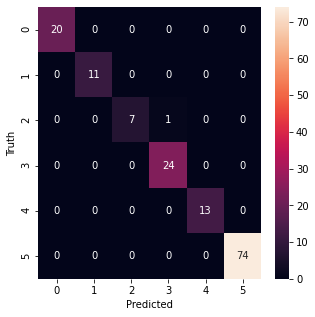

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      0.88      0.93         8
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        74

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



In [71]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

0.9866666666666667
0.014740554623801774


Logistic Regression

In [72]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

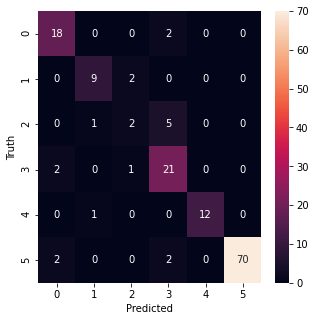

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.82      0.82      0.82        11
           2       0.40      0.25      0.31         8
           3       0.70      0.88      0.78        24
           4       1.00      0.92      0.96        13
           5       1.00      0.95      0.97        74

    accuracy                           0.88       150
   macro avg       0.79      0.79      0.78       150
weighted avg       0.88      0.88      0.88       150



In [78]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8755555555555554
0.03744955454745049


Kernel SVM

In [79]:
#fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

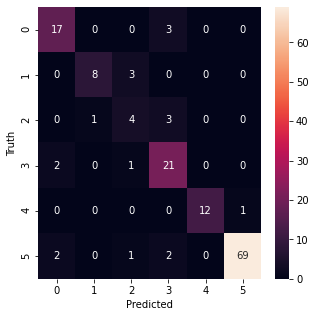

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.89      0.73      0.80        11
           2       0.44      0.50      0.47         8
           3       0.72      0.88      0.79        24
           4       1.00      0.92      0.96        13
           5       0.99      0.93      0.96        74

    accuracy                           0.87       150
   macro avg       0.81      0.80      0.80       150
weighted avg       0.89      0.87      0.88       150



In [83]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8644444444444443
0.04030746032714899


Linear SVM

In [84]:
#fitting kernel SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

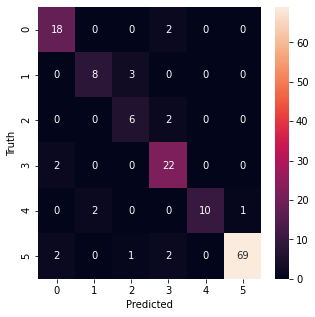

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.80      0.73      0.76        11
           2       0.60      0.75      0.67         8
           3       0.79      0.92      0.85        24
           4       1.00      0.77      0.87        13
           5       0.99      0.93      0.96        74

    accuracy                           0.89       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.90      0.89      0.89       150



In [88]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.928888888888889
0.019372884193514132


K-NN

In [89]:
from sklearn.neighbors import KNeighborsClassifier as knc
classifier=knc(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

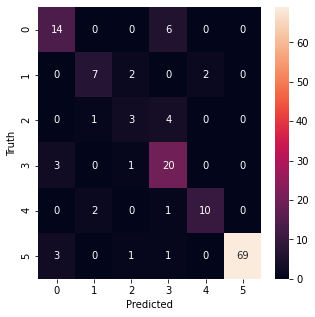

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.70      0.64      0.67        11
           2       0.43      0.38      0.40         8
           3       0.62      0.83      0.71        24
           4       0.83      0.77      0.80        13
           5       1.00      0.93      0.97        74

    accuracy                           0.82       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.83      0.82      0.82       150



In [93]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.8044444444444444
0.05239922721134044


Decision Tree

In [94]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy' , random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

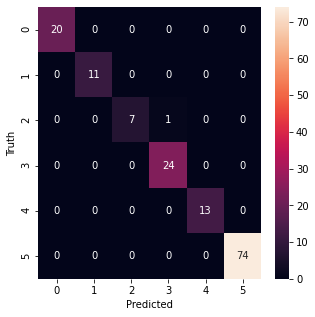

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      0.88      0.93         8
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        74

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



In [98]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9911111111111112
0.014740554623801772


Naive Bayes

In [99]:
#fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

Text(24.0, 0.5, 'Truth')

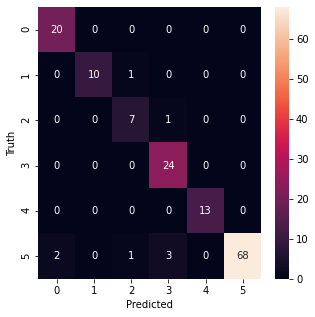

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.91      0.95        11
           2       0.78      0.88      0.82         8
           3       0.86      1.00      0.92        24
           4       1.00      1.00      1.00        13
           5       1.00      0.92      0.96        74

    accuracy                           0.95       150
   macro avg       0.92      0.95      0.93       150
weighted avg       0.95      0.95      0.95       150



In [104]:
#applying k-fold cross validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.9555555555555555
0.024343224778007367


Therefore Final Evaluation will be done with Decision Tree as its                 
Mean Accuracy = 0.9911111111111112                            
Mean Std. Dev = 0.014740554623801772, is highest amongst all the classifiers.

# Hyperparameter Tuning

In [105]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [106]:
#applying grid search to find the best model and best parameters
from sklearn.model_selection import GridSearchCV as gsv
parameters = [{'splitter':['best','random'],'criterion':['entropy','gini'],'max_depth':['None',2,4,6]}]
grid_search=gsv(estimator=classifier,
                param_grid=parameters,
                scoring='accuracy',
                cv=10,
                n_jobs=1)
grid_search=grid_search.fit(x_train,y_train)
print('best_accuracy=',grid_search.best_score_)
print('best_parameters=',grid_search.best_params_)

best_accuracy= 0.9911111111111112
best_parameters= {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


Therefore, Best Parameters = {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [107]:
#fitting decision tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(criterion='entropy' ,random_state=0, splitter='best', max_depth=4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#predicting the test set results
y_pred=classifier.predict(x_test)

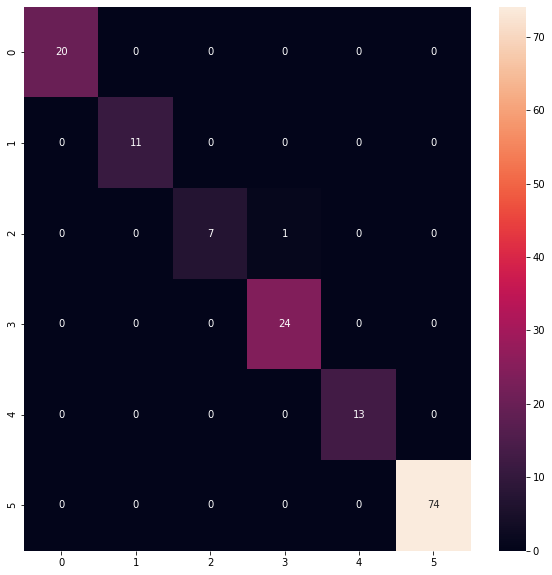

In [109]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)

In [110]:
#observating classification report for performance evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      0.88      0.93         8
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        74

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



# 9. Saving the Model

In [0]:
import pickle
filename = 'branch_allocation.sav'
pickle.dump(dtc, open(filename, 'wb'))

# 10. Creating a ML Pipeline

In [0]:
from sklearn.pipeline import Pipeline

Modeling

In [0]:
pipe = Pipeline([('standard', StandardScaler()),
                    #('boxcox'), stats.boxcox()),
                    ('l-svm', dtc())])

In [117]:
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standard',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('l-svm',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [118]:
score = pipe.score(x_test, y_test)
print('Decision Tree pipeline test accuracy: %.3f' % score)

Decision Tree pipeline test accuracy: 0.993


# 11. Generating Requirements File

In [0]:
!pip freeze > requirements.txt

# End